# Scaling

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read dataframe in
df = pd.read_csv('data/kickstarter_preprocess.csv')

In [3]:
df.columns

Index(['backers_count', 'country', 'goal', 'staff_pick', 'state',
       'usd_pledged', 'blurb_len_c', 'blurb_len_w', 'slug_len_c', 'slug_len_w',
       'cat_in_slug', 'category_parent_id', 'category_id', 'category_name',
       'created_year', 'created_month', 'deadline_year', 'deadline_month',
       'launched_year', 'launched_month', 'duration_days', 'preparation',
       'pledged_per_backer', 'rel_pledged_goal', 'filled_parent',
       'parent_name'],
      dtype='object')

### features to keep: preparation, duration_days, goal, pledged_per_backer, parent_name, staff_pick, blurb_len_w, slug_len_w, 'launched_month'

In [4]:
# drop unimportant features
df.drop(['backers_count', 'country', 'usd_pledged', 'blurb_len_c', 'slug_len_c', 'cat_in_slug', 
         'category_parent_id', 'category_id', 'category_name', 'created_year', 'created_month', 'deadline_year', 
         'deadline_month', 'launched_year', 'rel_pledged_goal', 'filled_parent'], 
        axis=1, inplace=True)

In [5]:
df.columns

Index(['goal', 'staff_pick', 'state', 'blurb_len_w', 'slug_len_w',
       'launched_month', 'duration_days', 'preparation', 'pledged_per_backer',
       'parent_name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177593 entries, 0 to 177592
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   goal                177593 non-null  float64
 1   staff_pick          177593 non-null  bool   
 2   state               177593 non-null  object 
 3   blurb_len_w         177593 non-null  int64  
 4   slug_len_w          177593 non-null  int64  
 5   launched_month      177593 non-null  int64  
 6   duration_days       177593 non-null  int64  
 7   preparation         177593 non-null  int64  
 8   pledged_per_backer  177593 non-null  int64  
 9   parent_name         177593 non-null  object 
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 12.4+ MB


## drop rows with state == canceled, rows with wrong categories

In [7]:
df = df.drop(df[df['state'] == "canceled" ].index)
df.shape

(168975, 10)

In [8]:
categories = ["Games", "Art", "Photography", "Film & Video", "Design", "Technology"]
df = df[df.parent_name.isin(categories)]
df.shape

(82036, 10)

## make dummies (staff_pick, state, category_name)

In [9]:
df.staff_pick = df.staff_pick.astype('int')

In [10]:
df['state'] = np.where(df['state'] == 'successful', 1, 0)
df.groupby('state').state.count()

state
0    38660
1    43376
Name: state, dtype: int64

In [11]:
# convert the categorical variable parent_name into dummy/indicator variables
df_dum2 = pd.get_dummies(df.parent_name, prefix='parent_name')
df = df.drop(['parent_name'], axis=1)
df = pd.concat([df, df_dum2], axis=1)

In [12]:
# making a categorical variable for launched_month q1, q2, q3, q4 
df.loc[df['launched_month'] <  4, 'time_yr'] = 'q1'
df.loc[(df['launched_month'] >=  4) & (df['launched_month'] <  7), 'time_yr'] = 'q2'
df.loc[(df['launched_month'] >=  7) & (df['launched_month'] <  10), 'time_yr'] = 'q3'
df.loc[df['launched_month'] >  9, 'time_yr'] = 'q4'

In [13]:
df_dum3 = pd.get_dummies(df.time_yr, prefix='time_yr')
df = df.drop(['time_yr'], axis=1)
df = df.drop(['launched_month'], axis=1)
df = pd.concat([df, df_dum3], axis=1)

In [14]:
df.columns

Index(['goal', 'staff_pick', 'state', 'blurb_len_w', 'slug_len_w',
       'duration_days', 'preparation', 'pledged_per_backer', 'parent_name_Art',
       'parent_name_Design', 'parent_name_Film & Video', 'parent_name_Games',
       'parent_name_Photography', 'parent_name_Technology', 'time_yr_q1',
       'time_yr_q2', 'time_yr_q3', 'time_yr_q4'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82036 entries, 0 to 177591
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   goal                      82036 non-null  float64
 1   staff_pick                82036 non-null  int64  
 2   state                     82036 non-null  int64  
 3   blurb_len_w               82036 non-null  int64  
 4   slug_len_w                82036 non-null  int64  
 5   duration_days             82036 non-null  int64  
 6   preparation               82036 non-null  int64  
 7   pledged_per_backer        82036 non-null  int64  
 8   parent_name_Art           82036 non-null  uint8  
 9   parent_name_Design        82036 non-null  uint8  
 10  parent_name_Film & Video  82036 non-null  uint8  
 11  parent_name_Games         82036 non-null  uint8  
 12  parent_name_Photography   82036 non-null  uint8  
 13  parent_name_Technology    82036 non-null  uint8  
 14  time_

In [16]:
df.head()

,goal,staff_pick,state,blurb_len_w,slug_len_w,duration_days,preparation,pledged_per_backer,parent_name_Art,parent_name_Design,parent_name_Film & Video,parent_name_Games,parent_name_Photography,parent_name_Technology,time_yr_q1,time_yr_q2,time_yr_q3,time_yr_q4
0,1000.00,0,1,22,4,30,8,41,0,0,0,1,0,0,0,0,1,0
2,12160.66,0,0,23,7,59,5,55,0,0,0,1,0,0,1,0,0,0
15,54737.83,0,0,3,2,20,3,5,1,0,0,0,0,0,0,0,1,0
16,2602.33,0,1,19,3,21,2,38,0,0,0,0,1,0,0,0,0,1
18,5000.00,0,1,25,7,29,0,84,1,0,0,0,0,0,1,0,0,0


## Train-Test-Split

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

In [18]:
y = df.state
X = df.drop('state', axis=1)

In [19]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Scaling


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# we have to define which columns we want to scale.
col_scale = ['goal', 'blurb_len_w', 'slug_len_w', 'duration_days', 'preparation', 'pledged_per_backer']

### Data standardization

In [22]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled_st = scaler.fit_transform(X_train[col_scale])
X_test_scaled_st = scaler.transform(X_test[col_scale])

In [23]:
# Concatenating scaled and dummy columns 
X_train_preprocessed_st = np.concatenate([X_train_scaled_st, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed_st = np.concatenate([X_test_scaled_st, X_test.drop(col_scale, axis=1)], axis=1)

### Data normalization

# Scaling with MinMaxScaler

# Try to scale you data with the MinMaxScaler() from sklearn. 
# It follows the same syntax as the StandardScaler.
# Don't forget: you have to import the scaler at the top of your notebook. 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled_nor = scaler.fit_transform(X_train[col_scale])
X_test_scaled_nor = scaler.transform(X_test[col_scale])

# Concatenating scaled and dummy columns 
X_train_preprocessed_nor = np.concatenate([X_train_scaled_nor, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed_nor = np.concatenate([X_test_scaled_nor, X_test.drop(col_scale, axis=1)], axis=1)

In [24]:
df.groupby('state').state.count()

state
0    38660
1    43376
Name: state, dtype: int64

## Model Classification and Gridsearch (tuning hyperparameters)

### Logistic Regression

In [25]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [26]:
# fit model
lr = LogisticRegression()
lr.fit(X_train_preprocessed_st, y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test_preprocessed_st)

In [29]:
confusion_matrix(y_test, y_pred)

array([[5291, 2441],
       [1823, 6853]])

In [30]:
# normalization
#print (classification_report(y_test, y_pred))

In [31]:
# standardization
print classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      7732
           1       0.74      0.79      0.76      8676

    accuracy                           0.74     16408
   macro avg       0.74      0.74      0.74     16408
weighted avg       0.74      0.74      0.74     16408



In [32]:
# Gridsearch https://www.kaggle.com/enespolat/grid-search-with-logistic-regression
grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_preprocessed_st,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.7474250324022859


In [35]:
# fit model
lr2 = LogisticRegression(C=1000.0,penalty="l2")
lr2.fit(X_train_preprocessed_st, y_train)
y_pred = lr2.predict(X_test_preprocessed_st)
confusion_matrix(y_test, y_pred)

array([[5311, 2421],
       [1772, 6904]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      7732
           1       0.74      0.80      0.77      8676

    accuracy                           0.74     16408
   macro avg       0.75      0.74      0.74     16408
weighted avg       0.74      0.74      0.74     16408



### Kernel SVM

In [36]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [37]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_preprocessed_st.shape,  y_train.shape)
print ('Test set:', X_test_preprocessed_st.shape,  y_test.shape)

Train set: (65628, 17) (65628,)
Test set: (16408, 17) (16408,)


In [38]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train_preprocessed_st, y_train) 

SVC()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      7732
           1       0.74      0.80      0.77      8676

    accuracy                           0.74     16408
   macro avg       0.75      0.74      0.74     16408
weighted avg       0.74      0.74      0.74     16408

Confusion matrix, without normalization
[[5311 2421]
 [1772 6904]]


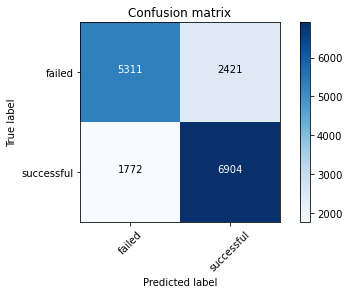

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['failed','successful'],normalize= False,  title='Confusion matrix')

In [43]:
param_grid = [{'kernel': ['rbf'], 
               'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 
               'C': [1, 10, 100, 1000]}]

grid = GridSearchCV(clf, param_grid, verbose=True, n_jobs=-1)

result = grid.fit(X_train_preprocessed_st, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
# Print best parameters 
print('Best Parameters:', result.best_params_)

# Print best score
print('Best Score:', result.best_score_)

In [ ]:
clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train_preprocessed_st, y_train)

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['failed','successful'],normalize= False,  title='Confusion matrix')

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [45]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [46]:
# Fit on training data
model.fit(X_train_preprocessed_st, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=42,
                       verbose=1)

In [47]:
y_pred = model.predict(X_test_preprocessed_st)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [48]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(X_train_preprocessed_st)
train_rf_probs = model.predict_proba(X_train_preprocessed_st)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(X_test_preprocessed_st)
rf_probs = model.predict_proba(X_test_preprocessed_st)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7732
           1       0.81      0.90      0.85      8676

    accuracy                           0.83     16408
   macro avg       0.84      0.83      0.83     16408
weighted avg       0.84      0.83      0.83     16408

Confusion matrix, without normalization
[[5882 1850]
 [ 901 7775]]


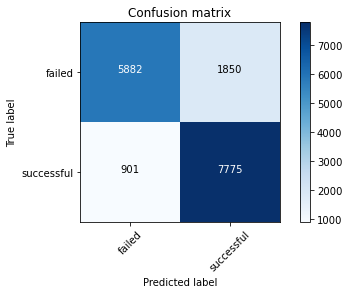

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['failed','successful'],normalize= False,  title='Confusion matrix')

In [50]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7732
           1       0.81      0.90      0.85      8676

    accuracy                           0.83     16408
   macro avg       0.84      0.83      0.83     16408
weighted avg       0.84      0.83      0.83     16408



### Random Forest: Optimization through Random Search

In [53]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 5, random_state=42)

# Fit 
rs.fit(X_train_preprocessed_st, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   34.6s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   44.9s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                     

In [54]:
rs.best_params_

{'n_estimators': 196,
 'min_samples_split': 10,
 'max_leaf_nodes': 49,
 'max_features': 0.7,
 'max_depth': 17,
 'bootstrap': True}

In [61]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=196, 
                               random_state=42, 
                               min_samples_split=10,
                               max_leaf_nodes=49,
                               max_features=0.7,
                               max_depth=17,
                               bootstrap=True,
                               n_jobs=-1, verbose = 1)

In [62]:
# Fit on training data
model.fit(X_train_preprocessed_st, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    2.9s finished


RandomForestClassifier(max_depth=17, max_features=0.7, max_leaf_nodes=49,
                       min_samples_split=10, n_estimators=196, n_jobs=-1,
                       random_state=42, verbose=1)

In [63]:
y_pred = model.predict(X_test_preprocessed_st)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 196 out of 196 | elapsed:    0.1s finished


In [64]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(X_train_preprocessed_st)
train_rf_probs = model.predict_proba(X_train_preprocessed_st)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(X_test_preprocessed_st)
rf_probs = model.predict_proba(X_test_preprocessed_st)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 196 out of 196 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 196 out of 196 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 196 out of 196 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 196 out of 196 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.88      0.73      0.80      7732
           1       0.79      0.91      0.85      8676

    accuracy                           0.83     16408
   macro avg       0.84      0.82      0.82     16408
weighted avg       0.84      0.83      0.83     16408

Confusion matrix, without normalization
[[5647 2085]
 [ 738 7938]]


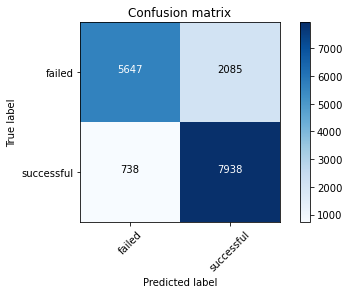

In [65]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['failed','successful'],normalize= False,  title='Confusion matrix')

### Use best model

In [55]:
best_model = rs.best_estimator_

In [57]:
train_rf_predictions = best_model.predict(X_train_preprocessed_st)
train_rf_probs = best_model.predict_proba(X_train_preprocessed_st)[:, 1]

rf_predictions = best_model.predict(X_test_preprocessed_st)
rf_probs = best_model.predict_proba(X_test_preprocessed_st)[:, 1]

In [58]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 97
Average maximum depth 10


In [66]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');



In [67]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

NameError: name 'recall_score' is not defined